<a href="https://colab.research.google.com/github/renatarep-ad/AD_pandas_exemplos/blob/main/analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

######Parte 1

In [343]:
#Analise exploratoria para clientes com possibilidade de churn
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel('/content/clientes_churn.xlsx')
df.head(15)

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
0,1,619,PA,F,54,2,0.0,1,1,1,234234.0,0
1,2,607,SC,M,67,1,334.0,1,0,0,34345.0,1
2,3,450,SP,M,55,1,24212.0,3,0,1,454.0,0
3,4,598,SP,M,32,4,0.0,2,0,1,6456.0,0
4,5,601,MG,M,45,3,6545.0,1,1,1,5345.0,0
5,6,760,PA,F,65,2,77764.0,1,1,1,654332.0,0
6,7,349,AC,F,23,3,755.0,4,1,0,756543.0,1
7,8,590,AM,F,54,1,0.0,3,1,0,36544.0,1
8,9,678,AC,F,29,1,33433.0,2,0,0,343675.0,1
9,10,802,PA,M,39,2,5565.0,1,1,1,767544.0,0


In [344]:
# Agrupamento por Estado
agp_e = df.groupby(['Estado']).size()
print(agp_e)

Estado
AC    2
AM    1
MA    1
MG    1
PA    3
SC    1
SP    2
dtype: int64


<Axes: xlabel='Estado'>

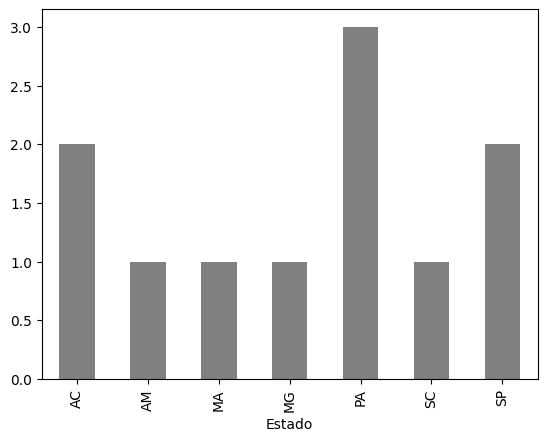

In [345]:
agp_e.plot.bar(color='gray')

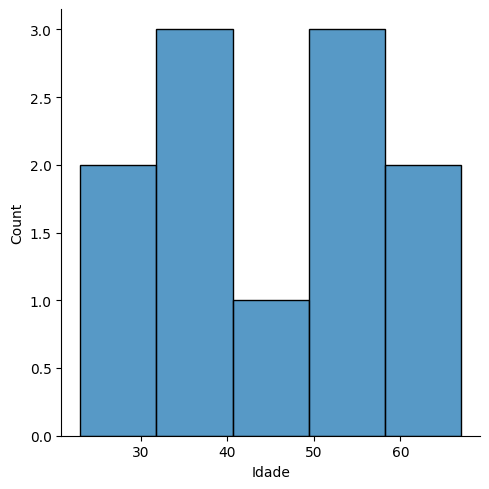

In [346]:
#df['Score'].describe()
srn.displot(df['Idade'])

In [347]:
#valores nan em Saldo e Salário
df.isnull().sum()

Id                  0
Score               0
Estado              0
Genero              0
Idade               0
Patrimonio          0
Saldo               1
Produtos            0
TemCartaoCredito    0
Ativo               0
Salario             1
Saiu                0
dtype: int64

In [348]:
df['Saldo'].describe()

count       10.000000
mean     14860.800000
std      24982.838985
min          0.000000
25%         83.500000
50%       3160.000000
75%      19795.250000
max      77764.000000
Name: Saldo, dtype: float64

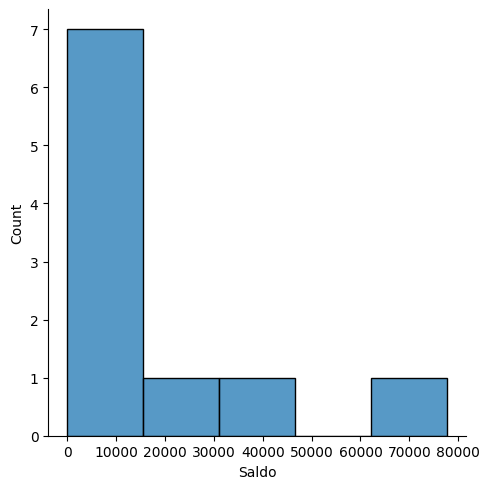

In [349]:
srn.displot(df['Saldo'])

In [350]:
# Tratamentos dos dados
#Remover NaN e subistituir pela mediana da coluna
import statistics as sts
mediana = sts.median(df['Saldo'])
mediana

5565.0

In [351]:
df['Saldo'].fillna(mediana,inplace=True)
df[['Saldo', 'Salario']].head(15)

,Saldo,Salario
0,0.0,234234.0
1,334.0,34345.0
2,24212.0,454.0
3,0.0,6456.0
4,6545.0,5345.0
5,77764.0,654332.0
6,755.0,756543.0
7,0.0,36544.0
8,33433.0,343675.0
9,5565.0,767544.0


In [352]:
mediana_salario = sts.median(df['Salario'])
mediana_salario

234234.0

In [353]:
df['Salario'].fillna(mediana_salario,inplace=True)
df[['Saldo', 'Salario']].head(15)

,Saldo,Salario
0,0.0,234234.0
1,334.0,34345.0
2,24212.0,454.0
3,0.0,6456.0
4,6545.0,5345.0
5,77764.0,654332.0
6,755.0,756543.0
7,0.0,36544.0
8,33433.0,343675.0
9,5565.0,767544.0


In [354]:
df.isnull().sum()

Id                  0
Score               0
Estado              0
Genero              0
Idade               0
Patrimonio          0
Saldo               0
Produtos            0
TemCartaoCredito    0
Ativo               0
Salario             0
Saiu                0
dtype: int64

In [355]:
#Dados duplicados
df[df.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
9,10,802,PA,M,39,2,5565.0,1,1,1,767544.0,0
10,10,690,MA,F,40,1,5565.0,1,1,1,234234.0,0


In [356]:
#Atualizar valor em coluna
df.loc[(df['Id']==10) & (df['Estado']=='MA'), 'Id'] = '11'
df['Id'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, '11'], dtype=object)

In [357]:
#Substituir SC e MG pela moda
grupo_e = df.groupby(['Estado']).size()
grupo_e #PA é o Estado com mais clientes (3)

Estado
AC    2
AM    1
MA    1
MG    1
PA    3
SC    1
SP    2
dtype: int64

In [358]:
df.loc[df['Estado'].isin(['SC','MG']), 'Estado'] = 'PA'
grupo_e = df.groupby(['Estado']).size()
print(grupo_e)

Estado
AC    2
AM    1
MA    1
PA    5
SP    2
dtype: int64


In [359]:
#Calcular o desvio padrão em Salário
des_sal = sts.stdev(df['Salario']) # = df['Salario'].describe() e visualizar std
des_sal

310029.2961756415

In [360]:
#Verificar se tem salário que está acima do desvio padrão (2x), se sim são os outliers (valores distante da média)
df.loc[df['Salario'] >= 2 * des_sal]


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
5,6,760,PA,F,65,2,77764.0,1,1,1,654332.0,0
6,7,349,AC,F,23,3,755.0,4,1,0,756543.0,1
9,10,802,PA,M,39,2,5565.0,1,1,1,767544.0,0


In [361]:
#Atualizar os salários que estão acima da média a partir da mediana (50% em describe())
mediana_sal = sts.median(df['Salario'])
mediana_sal

234234.0

In [362]:
#Atribuição da mediana para os salarios acima do desvio padrão
df.loc[df['Salario'] >= 2* des_sal, 'Salario'] = sts.median(df['Salario'])

#Verifica a atribuição
df.loc[df['Salario'] >=2*des_sal] #Sem valores outliers em Salário

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu


In [363]:
df.head(14)

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
0,1,619,PA,F,54,2,0.0,1,1,1,234234.0,0
1,2,607,PA,M,67,1,334.0,1,0,0,34345.0,1
2,3,450,SP,M,55,1,24212.0,3,0,1,454.0,0
3,4,598,SP,M,32,4,0.0,2,0,1,6456.0,0
4,5,601,PA,M,45,3,6545.0,1,1,1,5345.0,0
5,6,760,PA,F,65,2,77764.0,1,1,1,234234.0,0
6,7,349,AC,F,23,3,755.0,4,1,0,234234.0,1
7,8,590,AM,F,54,1,0.0,3,1,0,36544.0,1
8,9,678,AC,F,29,1,33433.0,2,0,0,343675.0,1
9,10,802,PA,M,39,2,5565.0,1,1,1,234234.0,0


In [364]:
#Visualizar com Loc e iLoc
d_loc=df.loc[(df['Score']<600)&(df['Produtos']<=3)&(df['Saiu']==0)]
print(f'Loc:\n{d_loc}')

#As 5 primeiras linhas das colunas Saldo, Ativo e Salário
df_iloc=df.iloc[0:5,[6,9,10]]
print(f'\nIloc:\n{d_iloc}')

Loc:
  Id  Score Estado Genero  Idade  Patrimonio    Saldo  Produtos  \
2  3    450     SP      M     55           1  24212.0         3   
3  4    598     SP      M     32           4      0.0         2   

   TemCartaoCredito  Ativo  Salario  Saiu  
2                 0      1    454.0     0  
3                 0      1   6456.0     0  

Iloc:
      Saldo  Produtos  TemCartaoCredito
0       0.0         1                 1
2   24212.0         3                 0
5  234234.0    234234            234234


#####Visualização em gráficos e dashboards

In [119]:
df.head(10)

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
0,1,619,PA,F,54,2,0.0,1,1,1,234234.0,0
1,2,607,PA,M,67,1,334.0,1,0,0,34345.0,1
2,3,450,SP,M,55,1,24212.0,3,0,1,454.0,0
3,4,598,SP,M,32,4,0.0,2,0,1,6456.0,0
4,5,601,PA,M,45,3,6545.0,1,1,1,5345.0,0
5,234234.0,234234,234234.0,234234.0,234234,234234,234234.0,234234,234234,234234,234234.0,234234
6,234234.0,234234,234234.0,234234.0,234234,234234,234234.0,234234,234234,234234,234234.0,234234
7,8,590,AM,F,54,1,0.0,3,1,0,36544.0,1
8,9,678,AC,F,29,1,33433.0,2,0,0,343675.0,1
9,234234.0,234234,234234.0,234234.0,234234,234234,234234.0,234234,234234,234234,234234.0,234234


In [257]:
#Valores apresentados no gráfico, 1° array = Quantidade, 2° array = Idade, 3 registros com valor em média de 58.2
h = np.histogram(df.iloc[:,4])
h

(array([1, 1, 1, 2, 0, 1, 0, 3, 0, 2]),
 array([23. , 27.4, 31.8, 36.2, 40.6, 45. , 49.4, 53.8, 58.2, 62.6, 67. ]))

In [260]:
df['Idade'].head(15)

0     54
1     67
2     55
3     32
4     45
5     65
6     23
7     54
8     29
9     39
10    40
Name: Idade, dtype: int64

Text(0.5, 0, 'Idade')

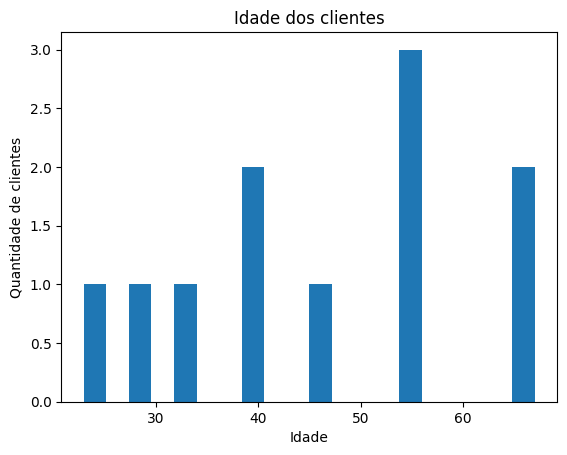

In [265]:
#Histograma, foi considerado o atributo 'Idade' (índice 4) dos clientes
#bins = quantidade de barras, divisões, opcional
plt.hist(df.iloc[:,4],bins =20)
plt.title('Idade dos clientes')
plt.ylabel('Quantidade de clientes')
plt.xlabel('Idade')

[Text(0.5, 1.0, 'Score - Clientes')]

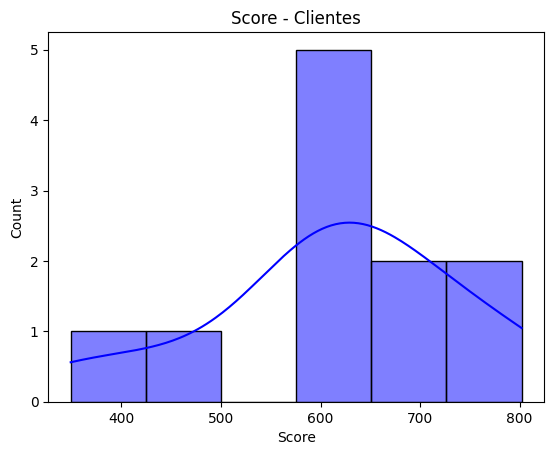

In [295]:
#Gráfico com linha de densidade
sns.histplot(df.iloc[:,1],kde=True, color='blue').set(title='Score - Clientes') #kde=true apresenta a linha de densidade com a variação dos valores junto com as barras

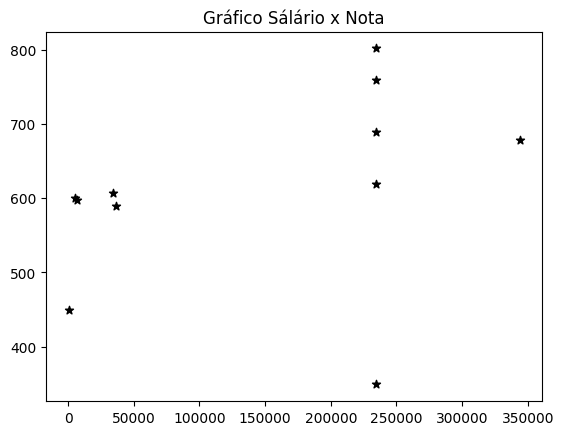

In [306]:
# Gráfico de dispersão. Utilizado para comparar informações numéricas
plt.scatter(x=df.Salario, y=df.Score, color = 'black', marker='*')
plt.title("Gráfico Sálário x Nota")
plt.xlable = 'Salário'
plt.ylable = 'Score'

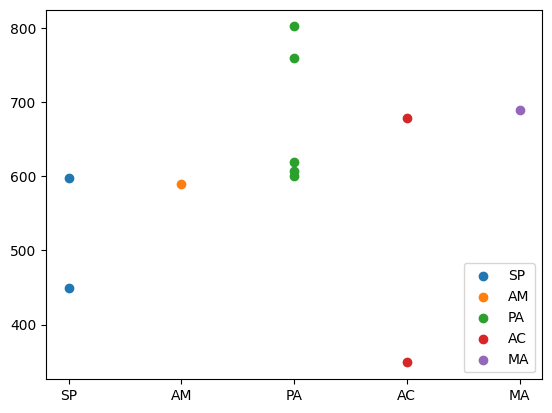

In [336]:
# Gráfico de dispersão
unico = list(set(df.Estado))
unico

x = df.Estado
y = df.Score
for i in range (len(unico)):
  indice = df.Estado == unico[i]
  plt.scatter(x[indice],y[indice],label = unico[i])
plt.legend(loc = 'lower right')

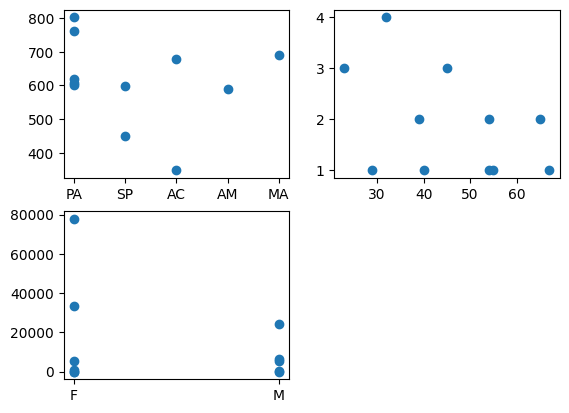

In [342]:
#Vários gráficos em uma tela
#Criação da figura principal
plt.figure(1)

#subplot (linha, coluna, posicao para imprimir (1 é o primeiro sub))
plt.subplot(2,2,1)
plt.scatter(df.Estado,df.Score)
plt.subplot(2,2,2)
plt.scatter(df.Idade,df.Patrimonio)
plt.subplot(2,2,3)
plt.scatter(df.Genero,df.Saldo)

In [266]:
df.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
0,1,619,PA,F,54,2,0.0,1,1,1,234234.0,0
1,2,607,PA,M,67,1,334.0,1,0,0,34345.0,1
2,3,450,SP,M,55,1,24212.0,3,0,1,454.0,0
3,4,598,SP,M,32,4,0.0,2,0,1,6456.0,0
4,5,601,PA,M,45,3,6545.0,1,1,1,5345.0,0
